In [36]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [37]:
columns = [
    'checking_account', 'duration', 'credit_history', 'purpose', 'credit_amount',
    'savings_account', 'employment', 'installment_rate', 'personal_status_sex',
    'other_debtors', 'residence_since', 'property', 'age', 'other_installment_plans',
    'housing', 'existing_credits', 'job', 'dependents', 'telephone', 'foreign_worker', 'class'
]

df = pd.read_csv('../dataset/german.txt', sep=' ', header=None, names=columns)

df['class'] = df['class'].map({1: 0, 2: 1})

categorical_columns = [
    'checking_account', 'credit_history', 'purpose', 'savings_account',
    'employment', 'personal_status_sex', 'other_debtors', 'property',
    'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker'
]

numerical_columns = [
    'duration', 'credit_amount', 'installment_rate', 'residence_since',
    'age', 'existing_credits', 'dependents'
]

In [38]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [39]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

dropped:


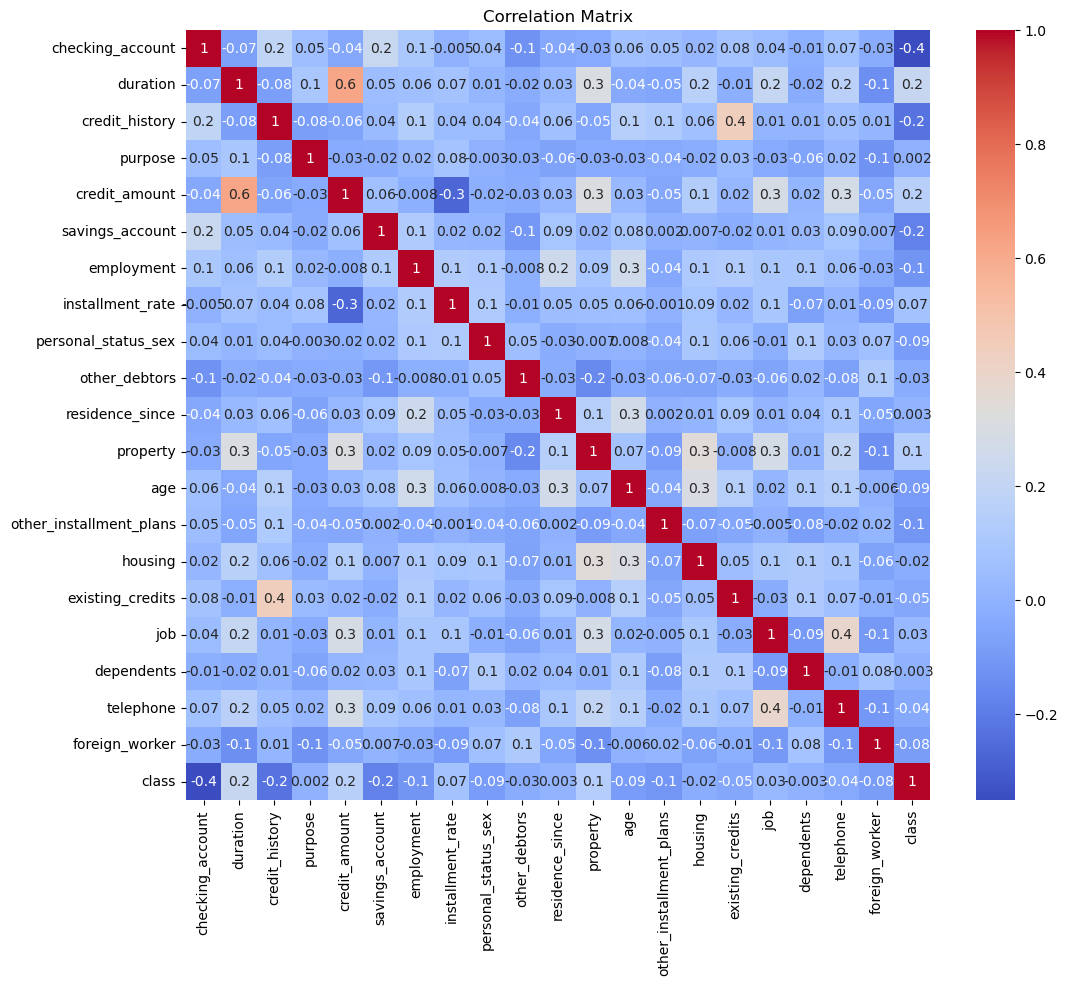

In [40]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("dropped:")
for column in to_drop:
    print(column)
# Drop highly correlated features
df = df.drop(to_drop, axis=1)
plt.figure(figsize=(12, 10))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".1g")
plt.title('Correlation Matrix')
plt.show()

In [41]:
y = df['class']
df = df.drop('class', axis=1)
x = df.values

In [79]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.15, random_state=42
)

Accuracy: 0.7133333333333334
Accuracy: 0.7333333333333333
Accuracy: 0.7733333333333333
Accuracy: 0.7533333333333333


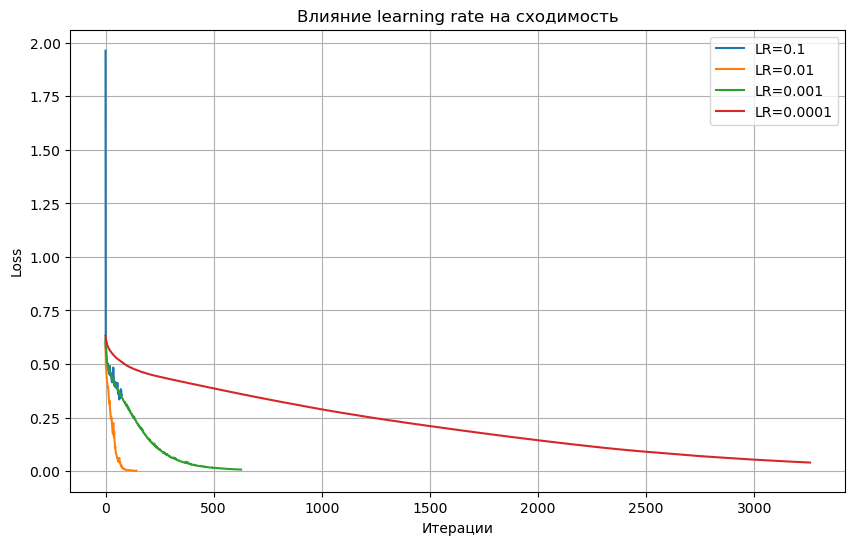

In [80]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
histories = []

for lr in learning_rates:
    mlp = MLPClassifier(
        hidden_layer_sizes=(50, 30),
        learning_rate_init=lr,
        learning_rate='constant',
        activation='relu',
        solver='adam',
        max_iter=5000,
        random_state=42,
        early_stopping=False,
        validation_fraction=0.1
    )
    mlp.fit(x_train, y_train)
    y_pred = mlp.predict(x_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    histories.append(mlp.loss_curve_)

plt.figure(figsize=(10, 6))
for lr, history in zip(learning_rates, histories):
    plt.plot(history, label=f'LR={lr}')

plt.title('Влияние learning rate на сходимость')
plt.xlabel('Итерации')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

